In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)

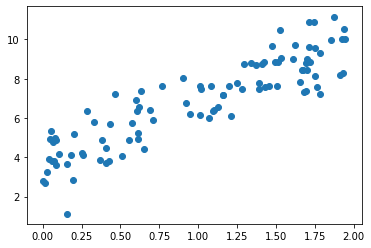

In [3]:
plt.scatter(X,y)
plt.show()

In [4]:
X_b = np.c_[np.ones((100,1)),X] # 모든 샘플에 X0=1 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # 정규 방정식
theta_best

array([[3.75303695],
       [3.08571225]])

In [5]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.75303695],
       [9.92446145]])

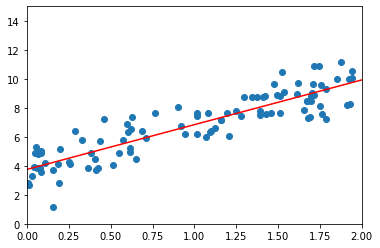

In [6]:
plt.plot(X_new,y_predict,'r-')
plt.scatter(X,y)
plt.axis([0,2,0,15])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.75303695]), array([[3.08571225]]))

In [8]:
lin_reg.predict(X_new)

array([[3.75303695],
       [9.92446145]])

## 배치 경사 하강법

In [9]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m *X_b.T.dot(X_b.dot(theta)-y)
    theta = theta -eta *gradients

In [10]:
theta

array([[3.75303695],
       [3.08571225]])

## 확률적 경사 하강법

In [11]:
n_epochs = 50
t0,t1 = 5,50
def learning_schedule(t):
    return t0/(t+t1)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta-eta*gradients
theta

array([[3.7004902 ],
       [3.11371943]])

In [12]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [13]:
sgd_reg.intercept_,sgd_reg.coef_

(array([3.75788764]), array([3.10766491]))

## 다항회귀

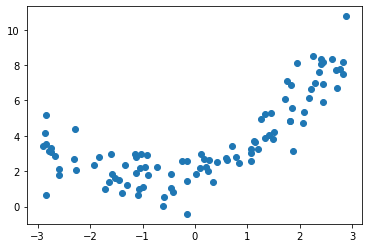

In [14]:
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2+X+2+np.random.randn(m,1)
plt.scatter(X,y)

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-2.85049459]
[-2.85049459  8.12531939]


In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([2.02926302]), array([[0.94373424, 0.4992002 ]]))

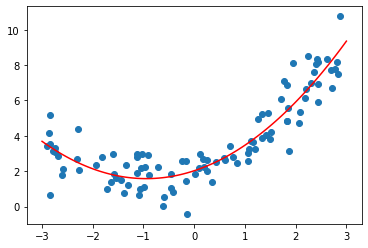

In [17]:
x_new = np.linspace(-3,3,100).reshape(100,1)
x_new_poly = poly_features.transform(x_new)
y_new = lin_reg.predict(x_new_poly)
plt.scatter(X,y)
plt.plot(x_new,y_new,'r-')

## 학습곡선

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=.2,random_state=42)
    train_errors,val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='train set')
    plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label = 'validation set')
    plt.legend()

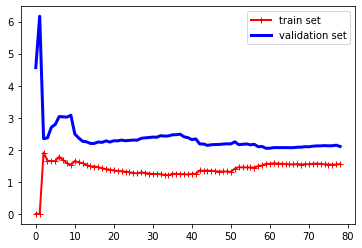

In [19]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

In [20]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([('poly_features',PolynomialFeatures(degree=10,include_bias=False)),\
                                 ('lin_reg',LinearRegression())])

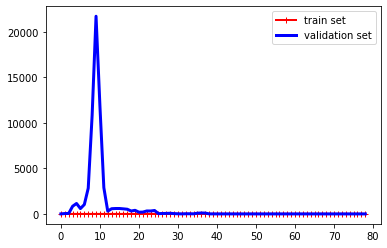

In [21]:
plot_learning_curves(polynomial_regression,X,y)

## Regulation

In [24]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.99476692]])

In [27]:
sgd_reg = SGDRegressor(max_iter=5,penalty='l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.17481422])

In [28]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.95461403])

In [29]:
sgd_reg = SGDRegressor(max_iter=5,penalty='l1')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.2352946])

In [31]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.95642244])

### early stoping